## Analysis

This is a second part of project aiming to create a model for classification of good and bad loans.

Contents:

    1. Preparing dataset for modeling
    2. Undersampling approach

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import random

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=1.6)

from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('data.csv')

### 1. Preparing dataset for modeling

Standarization and transformation of non-numerical values.

In [3]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,rating,recovery,delinq,derog,public_record,pymnt_received
0,2500.0,2500.0,2500.0,60,15.27,59.83,2,13,1,RENT,30000.0,Source Verified,car,GA,1.00,0.0,1999.0,5.0,3.0,0.0,1687.0,9.4,4.0,1,0.00,0.00,1008.71,1008.71,456.46,435.17,0.0,119.66,0.0,0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0
1,3000.0,3000.0,3000.0,60,12.69,67.79,1,9,2,RENT,80000.0,Source Verified,other,OR,17.94,0.0,1996.0,0.0,15.0,0.0,27783.0,53.9,38.0,1,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,67.79,0.0,0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,0.0,1.0
2,7000.0,7000.0,7000.0,60,15.96,170.08,2,14,9,RENT,47004.0,Not Verified,debt_consolidation,NC,23.51,0.0,2005.0,1.0,7.0,0.0,17726.0,85.6,11.0,1,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,170.08,0.0,0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,1.0
3,5600.0,5600.0,5600.0,60,21.28,152.39,5,26,5,OWN,40000.0,Source Verified,small_business,CA,5.55,0.0,2004.0,2.0,11.0,0.0,5210.0,32.6,13.0,1,0.00,0.00,646.02,646.02,162.02,294.94,0.0,152.39,0.0,0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0
4,5375.0,5375.0,5350.0,60,12.69,121.45,1,9,1,RENT,15000.0,Verified,other,TX,18.08,0.0,2004.0,0.0,2.0,0.0,9279.0,36.5,3.0,1,0.00,0.00,1476.19,1469.34,673.48,533.42,0.0,121.45,0.0,0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0


In [4]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,rating,recovery,delinq,derog,public_record,pymnt_received
count,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,6.776680e+05,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,6.776680e+05,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,6.776680e+05,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,6.776680e+05,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000
mean,15204.447716,15199.533584,15181.267149,44.000626,13.236162,444.373056,1.838596,11.159481,6.678201,7.530143e+04,18.787453,0.336157,1997.758143,0.645416,11.745917,0.211607,1.741430e+04,55.626332,25.290499,0.451127,11003.554141,10999.086776,5211.955100,5202.947365,3442.149258,1709.267641,0.408798,445.686636,0.016855,0.000753,82.878780,0.013727,0.005628,222.176761,1.354688e+05,0.034679,0.091715,0.023833,0.052415,0.637913,1145.038739,1.951534,0.043452,0.093084,184.520157,1.905966,3.174042e+04,0.029503,0.048029,0.061802,0.111986,0.036415,0.501747,0.269914,0.163089,0.973942
std,8500.191965,8497.347475,8499.036628,11.313938,4.419757,243.688371,1.315905,6.512291,3.921843,6.630349e+04,19.156159,0.898237,7.573462,0.950081,5.427074,0.620045,2.316333e+04,23.470357,11.848195,0.497606,8114.724284,8111.423772,5499.580888,5490.388410,3849.780932,2115.943122,4.190767,444.578073,0.145587,0.027423,3347.344577,0.538238,0.082751,1981.956681,1.526276e+05,0.292382,0.747716,0.220312,0.417123,5.959082,9941.296652,12.256792,0.361499,0.696059,1388.990698,11.174902,3.883007e+04,0.303703,0.549493,0.612408,0.315349,0.187320,0.499997,0.443915,0.369447,0.159309
min,500.000000,500.000000,0.000000,36.000000,5.320000,15.910000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1944.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8725.000000,8700.000000,8650.000000,36.000000,9.990000,267.550000,1.000000,6.000000,3.000000,4.500000e+04,12.450000,0.000000,1994.000000,0.000000,8.000000,0.000000,6.669750e+03,38.500000,17.000000,0.000000,4627.780000,4626.890000,1407.270000,1403.490000,878.930000,395.880000,0.000000,258.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.825600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.350000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,14000.000000,14000.000000,14000.000000,36.000000,12.990000,389.980000,2.000000,11.000000,7.000000,6.500000e+04,18.290000,0.000000,1999.000000,0.000000,11.000000,0.000000,1.221000e+04,56.400000,24.000000,0.000000,9564.250000,9559.345000,3420.580000,3414.340000,2155.610000,1003.61

Data needs to be standardized before applying any model as the numerical values have different ranges for different variables. 

In [5]:
X=data.drop(['rating'],axis=1,inplace=False)
y=data.rating

In [6]:
num_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'recovery',
       'delinq', 'derog', 'public_record', 'pymnt_received'],
      dtype='object')

In [7]:
scaler=StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,recovery,delinq,derog,public_record,pymnt_received
0,-1.494608,-1.494530,-1.492084,1.414131,0.460170,-1.578013,0.122656,0.282623,-1.447841,RENT,-0.683244,Source Verified,car,GA,-0.928551,-0.374242,0.163975,4.583384,-1.611536,-0.341277,-0.678975,-1.969564,-1.796942,1.103029,-1.356000,-1.356001,-0.764285,-0.763924,-0.775548,-0.602142,-0.097547,-0.733340,-0.115772,-0.027444,-0.02476,-0.025503,None,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,5.144076,-1.003500,-0.608031,-0.441441,0.163572
1,-1.435786,-1.435688,-1.433254,1.414131,-0.123573,-1.545348,-0.637278,-0.331601,-1.192859,RENT,0.070865,Source Verified,other,OR,-0.044239,-0.374242,-0.232145,-0.679328,0.599602,-0.341277,0.447634,-0.073554,1.072696,1.103029,-1.261492,-1.261455,-0.358170,-0.357129,-0.314057,-0.330915,-0.097547,-0.850012,-0.115772,-0.027444,-0.02476,-0.025503,None,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,-0.194398,0.996512,-0.608031,-0.441441,0.163572
2,-0.965208,-0.964953,-0.962612,1.414131,0.616287,-1.125590,0.122656,0.436178,0.592018,RENT,-0.426787,Not Verified,debt_consolidation,NC,0.246529,-0.374242,0.956216,0.373214,-0.874490,-0.341277,0.013456,1.277087,-1.206134,1.103029,-1.123194,-1.123100,0.531838,0.534369,0.433454,0.622287,-0.097547,-0.619929,-0.115772,-0.027444,-0.02476,-0.025503,None,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,-0.194398,-1.003500,-0.608031,-0.441441,0.163572
3,-1.129910,-1.129710,-1.127337,1.414131,1.819974,-1.198183,2.402458,2.278849,-0.427912,OWN,-0.532422,Source Verified,small_business,CA,-0.691029,-0.374242,0.824175,1.425757,-0.137444,-0.341277,-0.526881,-0.981082,-1.037332,1.103029,-1.356000,-1.356001,-0.830234,-0.829983,-0.852031,-0.668415,-0.097547,-0.659720,-0.115772,-0.027444,-0.02476,-0.025503,None,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,5.144076,-1.003500,-0.608031,-0.441441,0.163572
4,-1.156380,-1.156189,-1.156752,1.414131,-0.123573,-1.325149,-0.637278,-0.331601,-1.447841,RENT,-0.909477,Verified,other,TX,-0.036931,-0.374242,0.824175,-0.679328,-1.795797,-0.341277,-0.351215,-0.814915,-1.881343,1.103029,-1.356000,-1.356001,-0.679282,-0.680027,-0.719176,-0.555709,-0.097547,-0.729314,-0.115772,-0.027444,-0.02476,-0.025503,None,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,5.144076,-1.003500,-0.608031,-0.441441,0.163572


Next step is to use get dummies function that will transform all non numerical values to model-friendly format.

In [8]:
X=pd.get_dummies(X,drop_first=True)

In [9]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,recovery,delinq,derog,public_record,pymnt_received,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,-1.494608,-1.494530,-1.492084,1.414131,0.460170,-1.578013,0.122656,0.282623,-1.447841,-0.683244,-0.928551,-0.374242,0.163975,4.583384,-1.611536,-0.341277,-0.678975,-1.969564,-1.796942,1.103029,-1.356000,-1.356001,-0.764285,-0.763924,-0.775548,-0.602142,-0.097547,-0.733340,-0.115772,-0.027444,-0.02476,-0.025503,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,5.144076,-1.003500,-0.608031,-0.441441,0.163572,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.435786,-1.435688,-1.433254,1.414131,-0.123573,-1.545348,-0.637278,-0.331601,-1.192859,0.070865,-0.044239,-0.374242,-0.232145,-0.679328,0.599602,-0.341277,0.447634,-0.073554,1.072696,1.103029,-1.261492,-1.261455,-0.358170,-0.357129,-0.314057,-0.330915,-0.097547,-0.850012,-0.115772,-0.027444,-0.02476,-0.025503,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,-0.194398,0.996512,-0.608031,-0.441441,0.163572,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.965208,-0.964953,-0.962612,1.414131,0.616287,-1.125590,0.122656,0.436178,0.592018,-0.426787,0.246529,-0.374242,0.956216,0.373214,-0.874490,-0.341277,0.013456,1.277087,-1.206134,1.103029,-1.123194,-1.123100,0.531838,0.534369,0.433454,0.622287,-0.097547,-0.619929,-0.115772,-0.027444,-0.02476,-0.025503,-0.068012,-0.1121,-0.887578,-0.118609,-0.12266,-0.10818,-0.125659,-0.107049,-0.11518,-0.159221,-0.120199,-0.13373,-0.132845,-0.170558,-0.817419,-0.097143,-0.087407,-0.100916,-0.194398,-1.003500,-0.608031,-0.441441,0.163572,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.129910,-1.129710,-1.127337,1.414131,1

In [10]:
X.shape

(677668, 128)

In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score 

### 2. Undersampling approach

As the dataset is imbalanced (11% are bad loans), I want to test the approach of a repeated undersampling where each time model work on evenly distributed data.

I will use two functions, first one creates a confusion matrix and second one provides the repeated undersampling solution for tested models and prints out accuracy, recall and most importantly ROC AUC score.

In [12]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
from copy import deepcopy

def cross_validate_repeated_undersampling_full(X, Y, model, n_estimators=3, cv=StratifiedKFold(5,random_state=1)):
    
    preds = []
    true_labels = []
        
    for train_index, test_index in cv.split(X,Y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
        scores = np.zeros((n_estimators,len(y_test)))
        for i in range(n_estimators):
            num1 = len(y_train[y_train==1])
            ind0 = np.random.choice(y_train.index[y_train==0], num1) 
            ind1 = y_train.index[y_train==1] 
            ind_final = np.r_[ind0, ind1]
            X_train_subsample = X_train.loc[ind_final]
            y_train_subsample = y_train.loc[ind_final]

            clf = deepcopy(model)
            clf.fit(X_train_subsample,y_train_subsample)  
            
            probs = clf.predict_proba(X_test)[:,1]
            scores[i,:] = probs

        preds_final = scores.mean(0) 
        preds.extend(preds_final)
        preds_labels=[round(x) for x in preds]
        
        true_labels.extend(y_test)
        
    cnf_matrix = confusion_matrix(true_labels,preds_labels)
    np.set_printoptions(precision=2)

    print("Accuracy score in the testing dataset: ", accuracy_score(true_labels,preds_labels))
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
        
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix
                    , classes=class_names
                    , title='Confusion matrix')
    plt.show()
        
    print("ROC AUC score in the testing dataset: ", roc_auc_score(true_labels,preds))
        
    fpr, tpr, _ = roc_curve(true_labels,preds)
    roc_auc = auc(fpr, tpr)
        
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return

In [14]:
models=[['LogisticRegression',LogisticRegression()],['RandomForest',RandomForestClassifier()],['NaiveBayes',GaussianNB()],['LDA',LinearDiscriminantAnalysis()],['QDA',QuadraticDiscriminantAnalysis()]]

Testing: LogisticRegression
Accuracy score in the testing dataset:  0.886212717732
Recall metric in the testing dataset:  0.761493760624


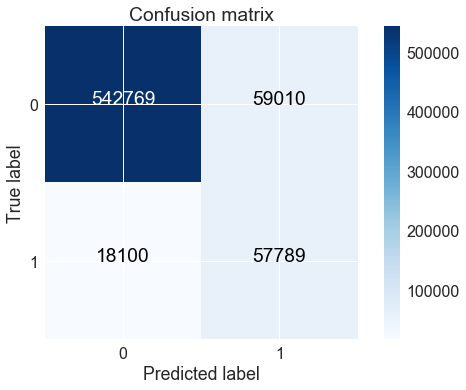

ROC AUC score in the testing dataset:  0.861653905447


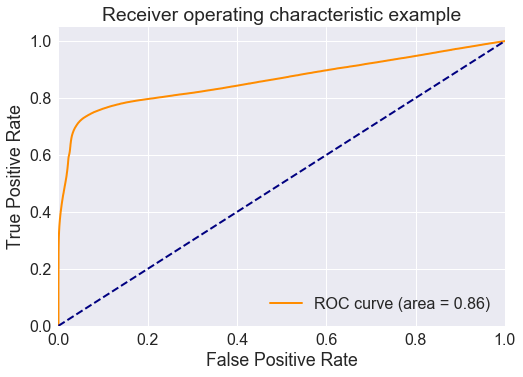

Testing: RandomForest
Accuracy score in the testing dataset:  0.587693383781
Recall metric in the testing dataset:  0.745984266494


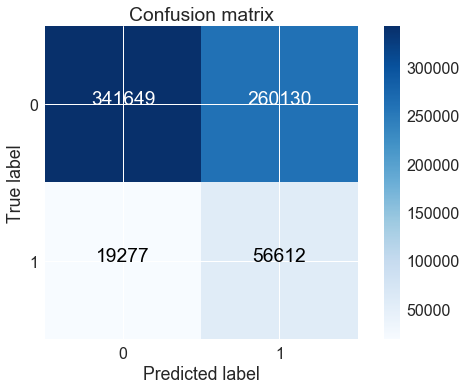

ROC AUC score in the testing dataset:  0.752425058222


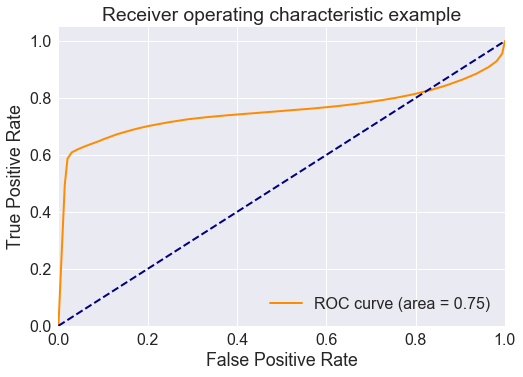

Testing: NaiveBayes
Accuracy score in the testing dataset:  0.904376479338
Recall metric in the testing dataset:  0.460356573416


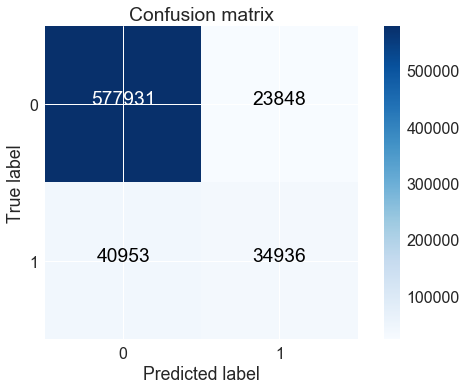

ROC AUC score in the testing dataset:  0.749033046276


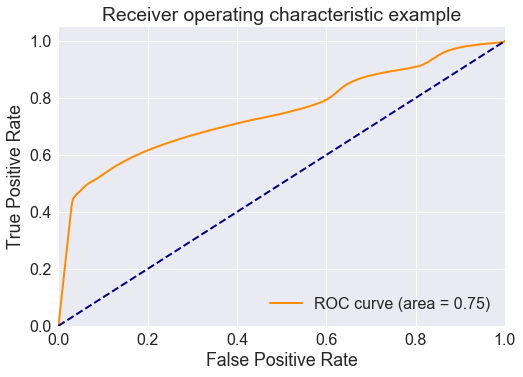

Testing: LDA
Accuracy score in the testing dataset:  0.876609195063
Recall metric in the testing dataset:  0.716625597913


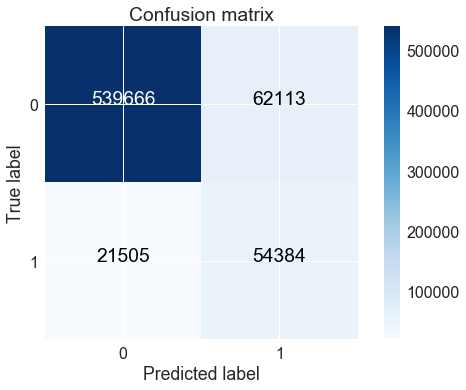

ROC AUC score in the testing dataset:  0.84248028078


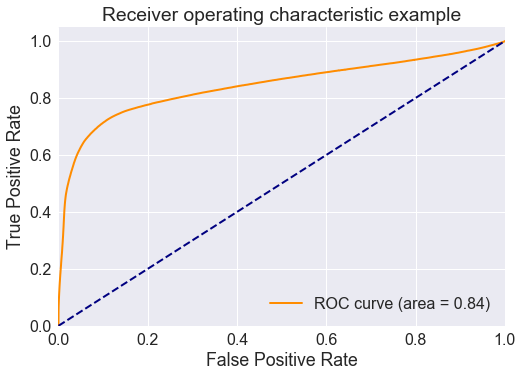

Testing: QDA
Accuracy score in the testing dataset:  0.932072932468
Recall metric in the testing dataset:  0.643176217897


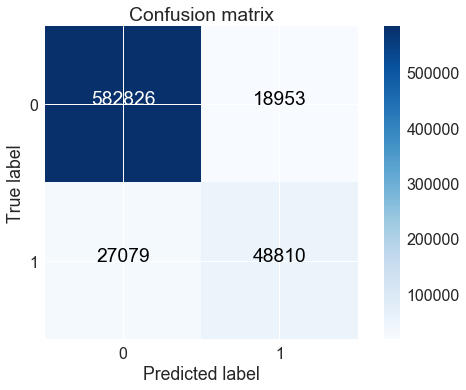

ROC AUC score in the testing dataset:  0.886872903569


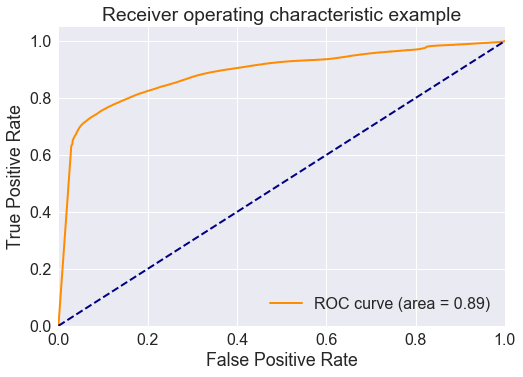

In [16]:
for e in models:
    print ("Testing:", e[0])
    cross_validate_repeated_undersampling_full(X, y, e[1])

The best model is QDA with ROC AUC score of 0.89, followed by Logistic Regression with 0.86 and LDA with 0.84. QDA seems to perform better with all thresholds above around 0.7 True Positive Rate.